## Optimisez la gestion des données d'une boutique avec Python

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des données</a>
 
**Partie 2 : Nettoyer les dataset**
 - <a href="#C2">Nettoyer les dataset</a>
 
**Partie 3 : Merger les données**
 - <a href="#C3">Merger les donées</a>
 
**Partie 4 : Analyser les données**
 - <a href="#C4">Analyser les donées</a>
 
 
# <a name="C1">Importation des données</a>

Importons l'ensemble des librairies:
pandas - manipuler des tableaux de données avec les variables (colonnes) et les individus (lignes) 
numpy - permet d’effectuer des calculs numériques avec Python. matplotlib - c'est une librairie qui permet de tracer des graphes seaborn - est basée sur Matplotlib, elle fournit différents types de visualisations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

#### Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.

## 1-  Import les dataset

importer fichier xlsx > convertir en csv

In [3]:
erp_xlsx = pd.read_excel('erp.xlsx','Sheet1',index_col=None)

In [4]:
erp_xlsx.to_csv('erp.csv',encoding='utf-8',index=False, header=True,sep = ',')

In [5]:
erp = pd.DataFrame(pd.read_csv("erp.csv"))

In [6]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [7]:
cms_xlsx= pd.read_excel('web.xlsx','Sheet1',index_col=None)

In [8]:
cms_xlsx.to_csv('web.csv', encoding = 'utf-8', index= False, header = True, sep = ',')

In [9]:
cms = pd.DataFrame(pd.read_csv("web.csv"))

In [10]:
cms.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
key_xlsx= pd.read_excel('liaison.xlsx','Sheet1',index_col=None)
key_xlsx.to_csv('liaison.csv', encoding = 'utf-8', index= False, header = True, sep = ',')
key = pd.DataFrame(pd.read_csv("liaison.csv"))
key.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


# <a name="C2"> 2 - Nettoyer les donées</a>

#### La liste des product_id est exhaustive, mais pour les références côté Web, j’en suis moins sûre... J’ai peiné à rapprocher certaines références.Je suis désolée, mais je me rends compte à l’instant que j’ai également mal nommé la colonne dans le fichier Excel. En fait, la colonne id_web dans mon fichier correspond au SKU des produits dans la boutique en ligne.
verifer valeur na, doublon afin d'identifier le champ clé primaire

In [12]:
erp.shape

(825, 5)

In [13]:
erp["product_id"].isnull().values.any()

False

In [14]:
erp.drop_duplicates(subset=['product_id'])

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


product_id n'a pas de valeur null ni de doublon, product_id est la clé primaire de la table erp

In [15]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [16]:
key.rename(columns={'id_web':'sku'}, inplace=True)

In [17]:
key.shape

(825, 2)

In [18]:
key["product_id"].isnull().values.any()

False

In [19]:
key["sku"].isnull().values.any()

True

In [20]:
key.drop_duplicates(subset=['product_id'])

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


product_id n'a pas de valeur null ni de doublon, product_id est la clé primaire de la table key

In [21]:
key.dtypes

product_id     int64
sku           object
dtype: object

In [22]:
cms.shape

(1513, 28)

In [23]:
cms.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

In [24]:
cms.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [25]:
cms_check_null= cms['sku'].isnull().sum()
cms_check_null

85

il y a 85 valeur null pour sku, créer une table avec sku null ensuite vérifier s'il y a des valeures dans des variables

In [26]:
cms_sku_null= cms.loc[cms['sku'].isnull(),:]
cms_sku_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cms_sku_null.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,85.0,85.0,85.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
mean,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0


il y a 2 lignes qui ont des valeures dans variables total_sales, avec valeur 0 car mean, min, max ont tous 0

In [28]:
cms_sku_null.sort_values(by='total_sales', ascending=False).head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### les 2 lignes seront également supprimées car total_sales == 0, supprimer toutes les valeurs NaN

In [29]:
cms1=cms.dropna(subset=['sku'])
cms1

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [30]:
cms1.loc[cms1[['sku']].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [31]:
sku_15891 =cms1.loc[(cms1['sku']=='15891')]
sku_15891

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
cms1.drop_duplicates(subset=['sku'], inplace=True, ignore_index=True)

In [33]:
cms1.shape

(714, 28)

# <a name="C3"> 3 - Merger les donées</a>

In [34]:
data1 = pd.merge(key,erp,on='product_id')

In [35]:
data1.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [36]:
data1.shape

(825, 6)

In [37]:
data1.dtypes

product_id          int64
sku                object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [38]:
data2= pd.merge(data1,cms1,how='right',on='sku')

In [39]:
data2

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,bon-cadeau-25-euros,1,25.0,0,instock,0,0,0,0.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,instock,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,7023,15891,1,27.5,15,instock,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,7025,15887,1,69.0,2,instock,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [40]:
data2.shape

(714, 33)

In [41]:
data2["ca_product"] = data2["total_sales"] * data2["price"]

In [42]:
data_top_vente=data2.sort_values(by= "ca_product", ascending=False).head(10)
data_top_vente

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca_product
195,4334,7818,1,49.0,0,outofstock,0,0,0,0.0,...,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4704.0
72,4144,1662,1,49.0,11,instock,0,0,0,0.0,...,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4263.0
219,4402,3510,1,176.0,8,instock,0,0,0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
71,4142,11641,1,53.0,8,instock,0,0,0,0.0,...,2020-08-20 09:30:03,2020-08-20 07:30:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1590.0
70,4141,304,1,39.0,1,instock,0,0,0,0.0,...,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1560.0
202,4355,12589,1,126.5,2,instock,0,0,0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
200,4352,15940,1,225.0,0,outofstock,0,0,0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
80,4153,16237,1,29.0,0,outofstock,0,0,0,0.0,...,2020-07-28 15:25:03,2020-07-28 13:25:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1044.0
651,6206,16580,1,25.2,120,instock,0,0,0,0.0,...,2020-08-27 10:12:58,2020-08-27 08:12:58,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1033.2
31,4068,16416,1,16.6,157,instock,0,0,0,0.0,...,2020-08-27 16:05:04,2020-08-27 14:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1029.2


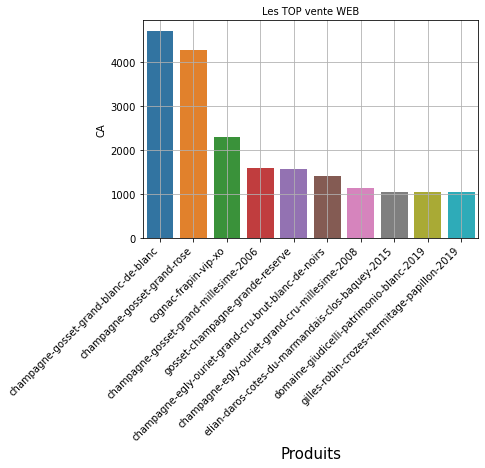

In [43]:
sns.barplot(data=data_top_vente, x='post_name', y='ca_product')
plt.title("Les TOP vente WEB",fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.grid()
plt.xlabel("Produits",fontsize=15)
yticks=plt.ylabel("CA",fontsize=10)
plt.show()

In [44]:
ca_total_vente_web= data2['ca_product'].sum()
print("Le total du chiffre d’affaires réalisé en ligne est", ca_total_vente_web, "EUR")

Le total du chiffre d’affaires réalisé en ligne est 70568.6 EUR


# <a name="C4"> 4 - Anaylser les donées</a>
### Détection d'outliers

#### Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

In [45]:
print(data2.isnull().sum())

product_id                 0
sku                        0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
ca_product                 0
dtype: int64


In [46]:
data2.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,ca_product
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


#### On peut observer que "price" a une valeur maximale très différée par rapport à la valeur de 75 %, nous pouvons donc dire que il y a des valeurs aberrantes dans ces données. En revanche, la valeur minimale n'a pas trop d'écart de la valeur de 25 %, ce qui signifie non présence de valeurs aberrantes au prix min. 

#### method 1- utilser boxplot pour detecter les outliers

<AxesSubplot:xlabel='price'>

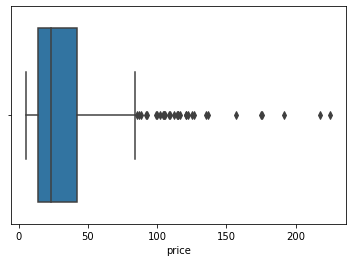

In [47]:
sns.boxplot(x=data2['price'])

In [48]:
upper_lim=data2['price'].quantile(.95)
df_outliers=data2[data2['price']>upper_lim]
df_outliers.sort_values(by=['price'], ascending= False)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca_product
200,4352,15940,1,225.0,0,outofstock,0,0,0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
426,5001,14581,1,217.5,20,instock,0,0,0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
587,5892,14983,1,191.3,10,instock,0,0,0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9
219,4402,3510,1,176.0,8,instock,0,0,0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
553,5767,15185,1,175.0,12,instock,0,0,0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
222,4406,7819,1,157.0,3,instock,0,0,0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
382,4904,14220,1,137.0,13,instock,0,0,0,0.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0
642,6126,14923,1,135.0,10,instock,0,0,0,0.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0
202,4355,12589,1,126.5,2,instock,0,0,0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
511,5612,14915,1,124.8,12,instock,0,0,0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


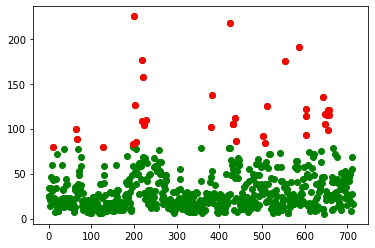

In [49]:
plt.scatter(data2['price'].index,data2['price'].values, c ="green")
plt.scatter(df_outliers['price'].index,df_outliers['price'].values, c ="red")
plt.show()

In [50]:
df_outliers_products=df_outliers.loc[:,['product_id','post_name','price','total_sales','ca_product']]
df_outliers_products.sort_values(by=['price'], ascending= False)

,product_id,post_name,price,total_sales,ca_product
200,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,5.0,1125.0
426,5001,david-duband-charmes-chambertin-grand-cru-2014,217.5,0.0,0.0
587,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,3.0,573.9
219,4402,cognac-frapin-vip-xo,176.0,13.0,2288.0
553,5767,camille-giroud-clos-de-vougeot-2016,175.0,0.0,0.0
222,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,0.0,0.0
382,4904,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,5.0,685.0
642,6126,champagne-gosset-celebris-vintage-2007,135.0,2.0,270.0
202,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,11.0,1391.5
511,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,0.0,0.0


#### champagne-egly-ouriet-grand-cru-millesime-2008 https://www.vivino.com/FR/fr/egly-ouriet-millesime-brut-champagne-grand-cru-ambonnay/w/2213776?affsrc=1&bottle_count=1&clickid=3Md2aIwcRxyNRvbznKy3QRqXUkDQ6twNEWnj080&irgwc=1&price_id=20370642&utm_campaign=PM_02_12&utm_content=RedBrain+Ltd&utm_medium=affiliate&utm_source=impact&year=2008
#### david-duband-charmes-chambertin-grand-cru-2014 https://www.vivino.com/FR/fr/david-duband-charmes-chambertin-grand-cru/w/1472184?bottle_count=1&gclid=CjwKCAjwwL6aBhBlEiwADycBIHvs7t4rCjnFoJUJDaWfv8dtve3vT0fRQiVgEA_Z-19uNTF81LDNDhoCJ5gQAvD_BwE&istBid=t&istCompanyId=fdd8dc22-e46f-4e11-99d6-c13dd2bd0f79&istFeedId=85b214d1-7686-4a7b-afb5-77b25d4e3a52&istItemId=pawmrwtxw&price_id=1389399&utm_campaign=PM_02_456&utm_content=FR&utm_medium=paid_search&utm_source=google&year=2011

### Les outliers ne sont pas des erreurs donc ne pas les suppirmer

#### method 2 Z-score

In [51]:
outliers =[]
def detect_outliers(data2):
    threshold=2
    mean=np.mean(data2)
    std=np.std(data2)
    
    for i in data2:
     z_score=(i-mean)/std
     if np.abs(z_score)>threshold:
        outliers.append(i)
    return outliers

In [52]:
detect_outliers(data2['price'])

[100.0,
 88.4,
 225.0,
 126.5,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]